In [1]:
!pip install inference_sdk

   ---------------------------------------- 0.0/151.5 kB ? eta -:--:--
   ---------------------------------------- 151.5/151.5 kB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 49.3/49.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 7.4 MB/s eta 0:00:06
    --------------------------------------- 0.7/38.8 MB 7.5 MB/s eta 0:00:06
   - -------------------------------------- 1.3/38.8 MB 9.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.9/38.8 MB 10.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.5/38.8 MB 11.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.0/38.8 MB 11.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/38.8 MB 12.3 MB/s eta 0:00:03
   ---- ----------------------------------- 4.4/38.8 MB 12.3 MB/s eta 0:00:03
   ----- --------

In [8]:
import matplotlib.pyplot as plt

In [32]:
!pip install roboflow supervision opencv-python

   ---------------------------------------- 0.0/79.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/79.9 kB ? eta -:--:--
   ------------------------------ --------- 61.4/79.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 79.9/79.9 kB 893.4 kB/s eta 0:00:00


In [63]:
from ultralytics import YOLO

model = YOLO("goals.pt")
result = model.predict("manc.mp4", save = True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/192) c:\Users\shiva\OneDrive\Desktop\BOSM project\goalpost detection\manc.mp4: 352x640 1 goalkeeper, 1 goalpost, 12 players, 737.9ms
video 1/1 (frame 2/192) c:\Users\shiva\OneDrive\Desktop\BOSM project\goalpost detection\manc.mp4: 352x640 1 goalpost, 12 players, 916.8ms
video 1/1 (frame 3/192) c:\Users\shiva\OneDrive\Desktop\BOSM project\goalpost detection\manc.mp4: 352x640 1 goalpost, 12 players, 685.5ms
video 1/1 (frame 4/192) c:\Use

In [42]:
# Alternative solution with online model + loop through results
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="R6141IiE3mHgsqA2IbMY"
)
results.append()
result = CLIENT.infer(r"fallen players/08fd33_4.mp4", model_id="goalpost-detection/1")

EncodingError: Could not encode bytes to OpenCV image.

In [34]:
# continuation of previous cell
from roboflow import Roboflow
import supervision as sv
import cv2

rf = Roboflow(api_key="R6141IiE3mHgsqA2IbMY")
project = rf.workspace().project("goalpost-detection")
model = project.version(1).model

result = model.predict("goalposts.jpg", confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread("your_image.jpg")

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

loading Roboflow workspace...
loading Roboflow project...


AttributeError: type object 'Detections' has no attribute 'from_roboflow'

In [56]:
print(result[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
conf: tensor([0.7598, 0.7374, 0.7190, 0.7116, 0.7105, 0.7000, 0.6889, 0.6875, 0.6845, 0.6813, 0.6743, 0.6712, 0.6674, 0.6658, 0.6607, 0.6601, 0.6475, 0.6384, 0.6364, 0.6299, 0.5633, 0.5311, 0.5126])
data: tensor([[5.0851e+01, 2.6702e+02, 6.2894e+01, 2.9404e+02, 7.5975e-01, 0.0000e+00],
        [5.7144e+02, 3.3131e+02, 5.8549e+02, 3.6213e+02, 7.3740e-01, 0.0000e+00],
        [3.4279e+02, 2.2158e+02, 3.5256e+02, 2.4688e+02, 7.1903e-01, 0.0000e+00],
        [4.2742e+02, 2.9588e+02, 4.3956e+02, 3.2306e+02, 7.1157e-01, 0.0000e+00],
        [2.4100e+02, 2.3039e+02, 2.5119e+02, 2.5296e+02, 7.1046e-01, 0.0000e+00],
        [2.5583e+02, 2.7007e+02, 2.6662e+02, 2.9709e+02, 7.0003e-01, 0.0000e+00],
        [1.1668e+02, 2.3769e+02, 1.3121e+02, 2.6329e+02, 6.8889e-01, 0.0000e+00],
        [1.2817e+02, 1.6214e+02, 1.3933e+02, 1.8425e+02, 

In [44]:
print(result)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

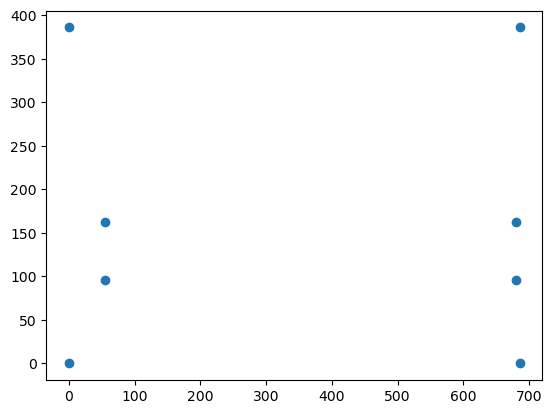

In [31]:
t = result['predictions'][0]
plt.scatter([0,686,0,686 ,t['x']-t['width']/2, t['x']+t['width']/2, t['x']-t['width']/2, t['x']+t['width']/2],[0,386,386,0,t['y']-t['height']/2, t['y']+t['height']/2, t['y']+t['height']/2, t['y']-t['height']/2])

In [35]:
from roboflow import Roboflow
rf = Roboflow(api_key="R6141IiE3mHgsqA2IbMY")
project = rf.workspace("ammara-razzaq-dkdlh").project("goalpost-detection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.89, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Goalpost-Detection-3 in yolov8:: 100%|██████████| 1320/1320 [00:01<00:00, 1058.77it/s]
